In [132]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

# Make a simple dataset

In [133]:
# Define class for dataset

class toy_set(Dataset):

    # Construct with defult values:
    def __init__(self, length = 100,transform =None):
        self.len = length
        self.x = 2*torch.ones(length,2)
        self.y = torch.ones(length,1)
        self.transform = transform

    # Gettar
    def __getitem__ (self,index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

In [134]:
our_dataset = toy_set()
print(f'Our toy_set object is {our_dataset }, which the index zero is equal {our_dataset[0]}, and the len of toy_set is equal {len(our_dataset)}')

Our toy_set object is <__main__.toy_set object at 0x7fb93ec70ca0>, which the index zero is equal (tensor([2., 2.]), tensor([1.])), and the len of toy_set is equal 100


In [135]:
for i in range(3):
    x, y = our_dataset[i]
    print('index: ',i, ', x:', x, '; y:',y )

index:  0 , x: tensor([2., 2.]) ; y: tensor([1.])
index:  1 , x: tensor([2., 2.]) ; y: tensor([1.])
index:  2 , x: tensor([2., 2.]) ; y: tensor([1.])


# Transform

In [136]:
class add_mult(object):
    def __init__(self,addx = 1,muly = 2):
        self.addx = addx
        self.muly = muly

    def __call__(self,sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x,y
        return sample

In [137]:
a_m = add_mult()
data_set_ = toy_set(transform = a_m)

In [138]:
data_set_

In [139]:
for i in range(10):
    x,y = our_dataset[i]
    print(i, x, y)
    x_, y_ = data_set_[i]
    print(i,x_,y_)

0 tensor([2., 2.]) tensor([1.])
0 tensor([3., 3.]) tensor([2.])
1 tensor([2., 2.]) tensor([1.])
1 tensor([3., 3.]) tensor([2.])
2 tensor([2., 2.]) tensor([1.])
2 tensor([3., 3.]) tensor([2.])
3 tensor([2., 2.]) tensor([1.])
3 tensor([3., 3.]) tensor([2.])
4 tensor([2., 2.]) tensor([1.])
4 tensor([3., 3.]) tensor([2.])
5 tensor([2., 2.]) tensor([1.])
5 tensor([3., 3.]) tensor([2.])
6 tensor([2., 2.]) tensor([1.])
6 tensor([3., 3.]) tensor([2.])
7 tensor([2., 2.]) tensor([1.])
7 tensor([3., 3.]) tensor([2.])
8 tensor([2., 2.]) tensor([1.])
8 tensor([3., 3.]) tensor([2.])
9 tensor([2., 2.]) tensor([1.])
9 tensor([3., 3.]) tensor([2.])


# Compose

In [140]:
from torchvision import transforms

Now we want to create a new transform lass that multiplies each of the elements by 100

In [141]:
class mult(object):

    # Constructor
    def __init__(self,mult = 100):
        self.mult = mult
    
    # Executor
    def __call__(self,sample):
        
        x = sample[0]
        y = sample[1]
        x = x*self.mult
        y = y*self.mult

        sample = x,y

        return sample

Now for Combine the transforms `add_mult()` and `mult()` we have

In [142]:
data_transform = transforms.Compose([add_mult(), mult()])
data_transform

Compose(
)

In [143]:
data_transform(our_dataset[0])

(tensor([300., 300.]), tensor([200.]))

# Dataset class for Images

In [191]:
from PIL import Image
import pandas as pd
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from torch.utils.data import Dataset,DataLoader
torch.manual_seed(0)

### Import a CSV file

In [215]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv 

--2023-09-06 15:30:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M   236KB/s    in 8.7s    

2023-09-06 15:30:16 (190 KB/s) - ‘index.csv’ saved [1680905/1680905]



In [216]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [217]:
directory = ""
csv_file = "index.csv"
csv_path = os.path.join(directory,csv_file)

Now we want to load an image from this class and display it

In [218]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [219]:
image_name = data_name.iloc[19, 1]
image_path=os.path.join(directory,image_name)
image_path

'img/fashion19.png'

In [220]:
image = Image.open(image_path)

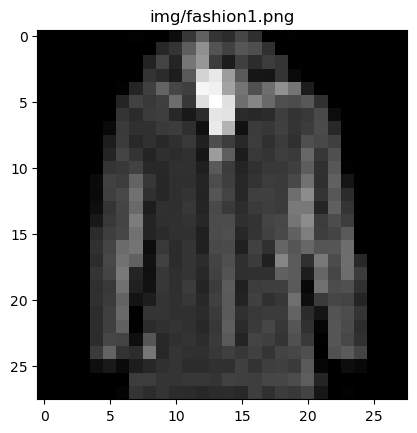

In [221]:
plt.imshow(image, cmap = 'gray', vmin = 0,vmax = 255)
plt.title(data_name.iloc[1,1])
plt.show()


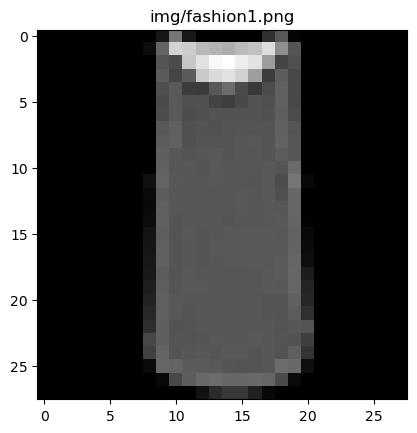

In [223]:
image_name = data_name.iloc[2, 1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path) # Image.open() is work by PIL or pillow
plt.imshow(image, cmap = 'gray', vmin = 0,vmax = 255)
plt.title(data_name.iloc[1,1])
plt.show()

In [229]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

# Torch vision Transforms

In [250]:
import torchvision.transforms as transforms
# To crop it
dataset = Dataset(csv_file, data_dir=directory, transform =transforms.CenterCrop(30))
dataset[1][0]

In [251]:
# To change to the tensor
dataset = Dataset(csv_file, data_dir=directory, transform =transforms.ToTensor())
dataset[1][0].shape

torch.Size([1, 28, 28])

# Torch vision Compose

In [253]:
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20),transforms.ToTensor()])
dataset = Dataset(csv_file, data_dir=directory, transform =croptensor_data_transform)
dataset[1][0].shape

torch.Size([1, 20, 20])

# Torch vision Datasets

In [254]:
import torchvision.datasets as dsets
dataset = dsets.MNIST(root = './data', train =False, download =True,transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 11457059.91it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 20831589.65it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 9716906.22it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7479595.12it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

